In [1]:
import math, glob, os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import importlib
import wrftools as wrf
import genutils as gu
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [2]:

run='run_02_land_dry_t06'
wolist=wrf.wolist(run)[:24]
# wolist=(wolist[1], wolist[10])
flistd=[wrf.wopath(run,wo) for wo in wolist]
flistd


['/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_00:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_02:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_03:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_04:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_05:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_06:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_07:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_08:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_09:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06

In [38]:
# centre of wind vectors minimzes dot product of position vector and wind vector
importlib.reload(wrf)
fpath=flistd[3]
print(fpath)
wrf.getWRF(fpath,'cc',force=True)
# old cc=[414, 404]
# new  array([416, 405])

/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t06/wrfout_d03_2007-09-06_03:00:00
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_03:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_03:00:00.P.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_03:00:00.u.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_03:00:00.v.raw.npy


array([415, 404])

In [33]:
# def get_cyc_circ_centre(fpath):
#     #1 find location of pressure min
#     P=wrf.getWRF(fpath,'P',z=20)
#     xmin,ymin=np.unravel_index(P.argmin(),P.shape)

#     #2 get downscaled wind vectors within $range of pressure min
#     u=wrf.getWRF(fpath,'u',z=20) # above surface layer
#     v=wrf.getWRF(fpath,'v',z=20)
#     cc=wrf.getWRF(fpath,'cc')
#     scl=10
#     nx,ny=u.shape
#     x=np.arange(0,nx,scl)
#     y=np.arange(0,ny,scl)
#     X, Y = np.meshgrid(x, y)
#     up=u[::scl,::scl]
#     vp=v[::scl,::scl]

#     rng=100
#     xlim=xmin-rng,xmin+rng
#     ylim=ymin-rng,ymin+rng+1
#     xx=np.logical_and(x>xlim[0], x<xlim[1])
#     yy=np.logical_and(y>ylim[0], y<ylim[1])

#     ix=np.ix_(xx,yy) 
#     Xc=X[ix]
#     Yc=Y[ix]
#     uc=up[ix]
#     vc=vp[ix]

#     # get circulation centre
#     y0s=np.arange(xlim[0],xlim[1],1)
#     x0s=np.arange(ylim[0],ylim[1],1)
#     dotperr_x=[]
#     for x0 in x0s:
#         dotperr_y=[]
#         for y0 in y0s:
#             dotperr_y.append(get_dotperr(x0,y0,Xc,Yc,uc,vc))
#         dotperr_x.append(dotperr_y)
#     dotperr=np.array(dotperr_x).T
#     ccy,ccx=np.unravel_index(dotperr.argmin(),dotperr.shape)
#     xmincc=x0s[ccx]
#     ymincc=y0s[ccy]

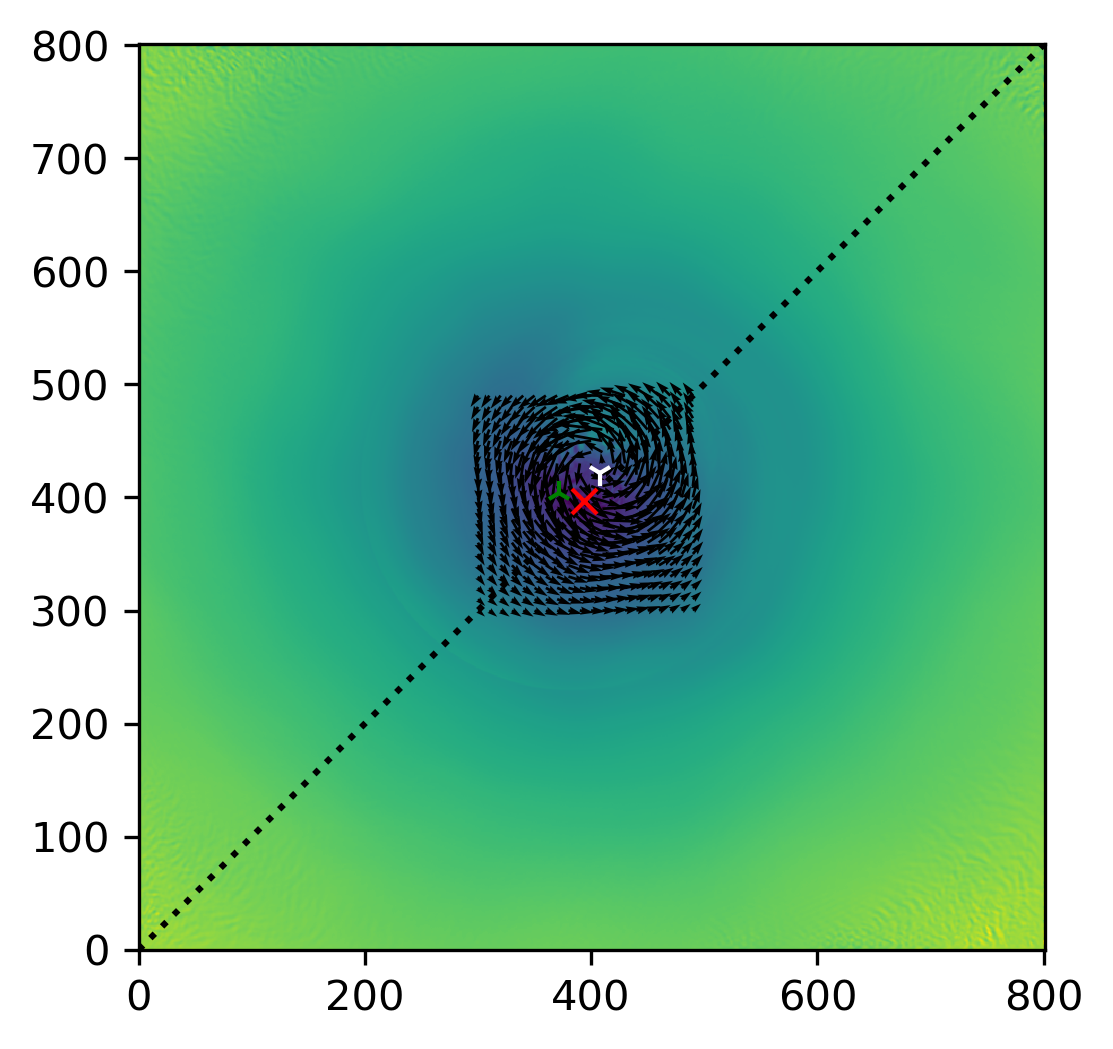

In [25]:
# fig,ax=plt.subplots(1,1,dpi=300)
# ax.pcolormesh(P,shading='auto')
# # ax.pcolormesh(x0s,y0s,dotperr,shading='auto')
# ax.plot((0,800),(0,800),'k:')
# ax.quiver(Xc,Yc,uc,vc)
# ax.plot(ymin,xmin,'rx')  
# ax.plot(xmincc,ymincc,'w1') 


# ax.plot(cc[1],cc[0],'g2')
# ax.set_aspect('equal','box')